# Einführung in XGBoost
### Präsentationsnotebook

m|rig GmbH

Gesa Murphy

## 1. Bibliotheken Importieren

In [1]:
# Standard Python Bibliotheken
import pandas as pd
import numpy as np

# Bibliotheken für Machine Learning und Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# xgboost Biblothek
import xgboost as xgb

# Bibliothek für SHAP values (XAI)
import shap

# Bibliotheken für Visualisierung
from plot_functions import plot_features,custom_cmap # Eigene Plot-Funktion
import matplotlib.pyplot as plt
import graphviz
from xgboost import to_graphviz
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)

scaler = StandardScaler()

## 2. Datensatz laden


In [3]:
# Lade Data.Frame
df = pd.read_csv("default of credit card clients preprocessed v3.csv",sep=";")

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'payment_status_m1', 'payment_status_m2', 'payment_status_m3',
       'payment_status_m4', 'payment_status_m5', 'payment_status_m6',
       'bill_amount_m1', 'bill_amount_m2', 'bill_amount_m3', 'bill_amount_m4',
       'bill_amount_m5', 'bill_amount_m6', 'payment_amount_m1',
       'payment_amount_m2', 'payment_amount_m3', 'payment_amount_m4',
       'payment_amount_m5', 'payment_amount_m6', 'default'],
      dtype='object')

In [5]:

df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,payment_status_m1,payment_status_m2,payment_status_m3,payment_status_m4,payment_status_m5,payment_status_m6,bill_amount_m1,bill_amount_m2,bill_amount_m3,bill_amount_m4,bill_amount_m5,bill_amount_m6,payment_amount_m1,payment_amount_m2,payment_amount_m3,payment_amount_m4,payment_amount_m5,payment_amount_m6,default
count,30000.000000,30000.000000,30000,29986,29946,30000.000000,27241.000000,26218.000000,25915.000000,25652.000000,25454.000000,25105.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,0.184171,0.135441,0.122863,0.080929,0.043451,0.042103,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,0.975753,1.032043,1.022076,0.985371,0.938445,0.948618,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,payment_status_m1,payment_status_m2,payment_status_m3,payment_status_m4,payment_status_m5,payment_status_m6,bill_amount_m1,bill_amount_m2,bill_amount_m3,bill_amount_m4,bill_amount_m5,bill_amount_m6,payment_amount_m1,payment_amount_m2,payment_amount_m3,payment_amount_m4,payment_amount_m5,payment_amount_m6,default
0,1,20000,female,university,married,24,2.0,2.0,-1.0,-1.0,NaN,NaN,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1.0,2.0,0.0,0.0,0.0,2.0,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0.0,0.0,0.0,0.0,0.0,0.0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0.0,0.0,0.0,0.0,0.0,0.0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1.0,0.0,-1.0,0.0,0.0,0.0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# 3. Datenanalyse

###  Einzelne Variablen darstellen

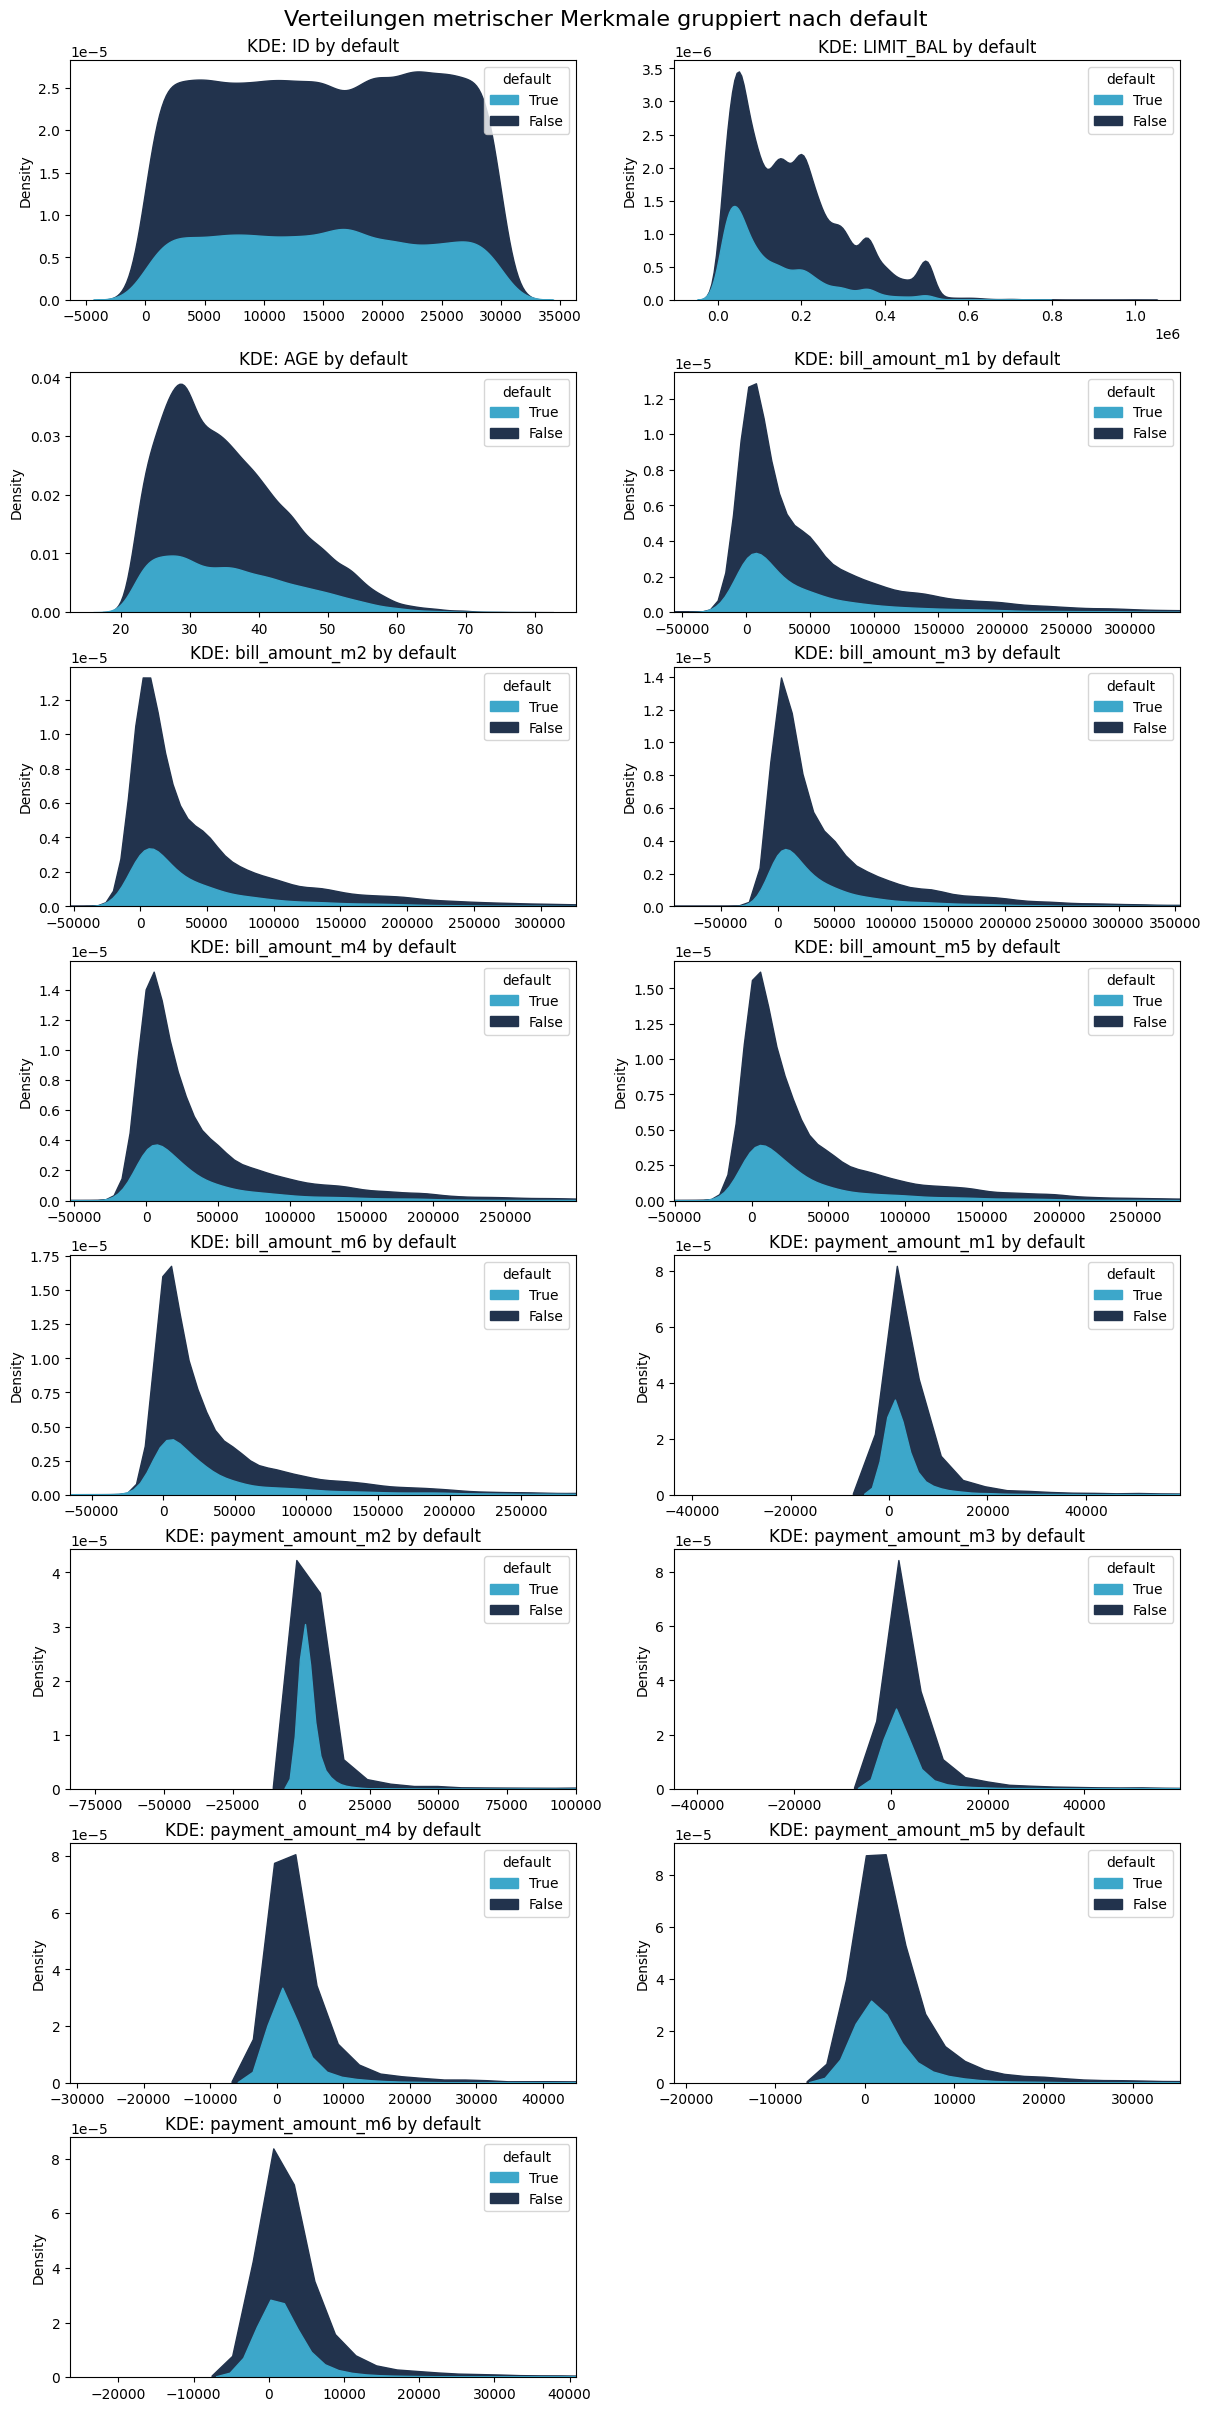

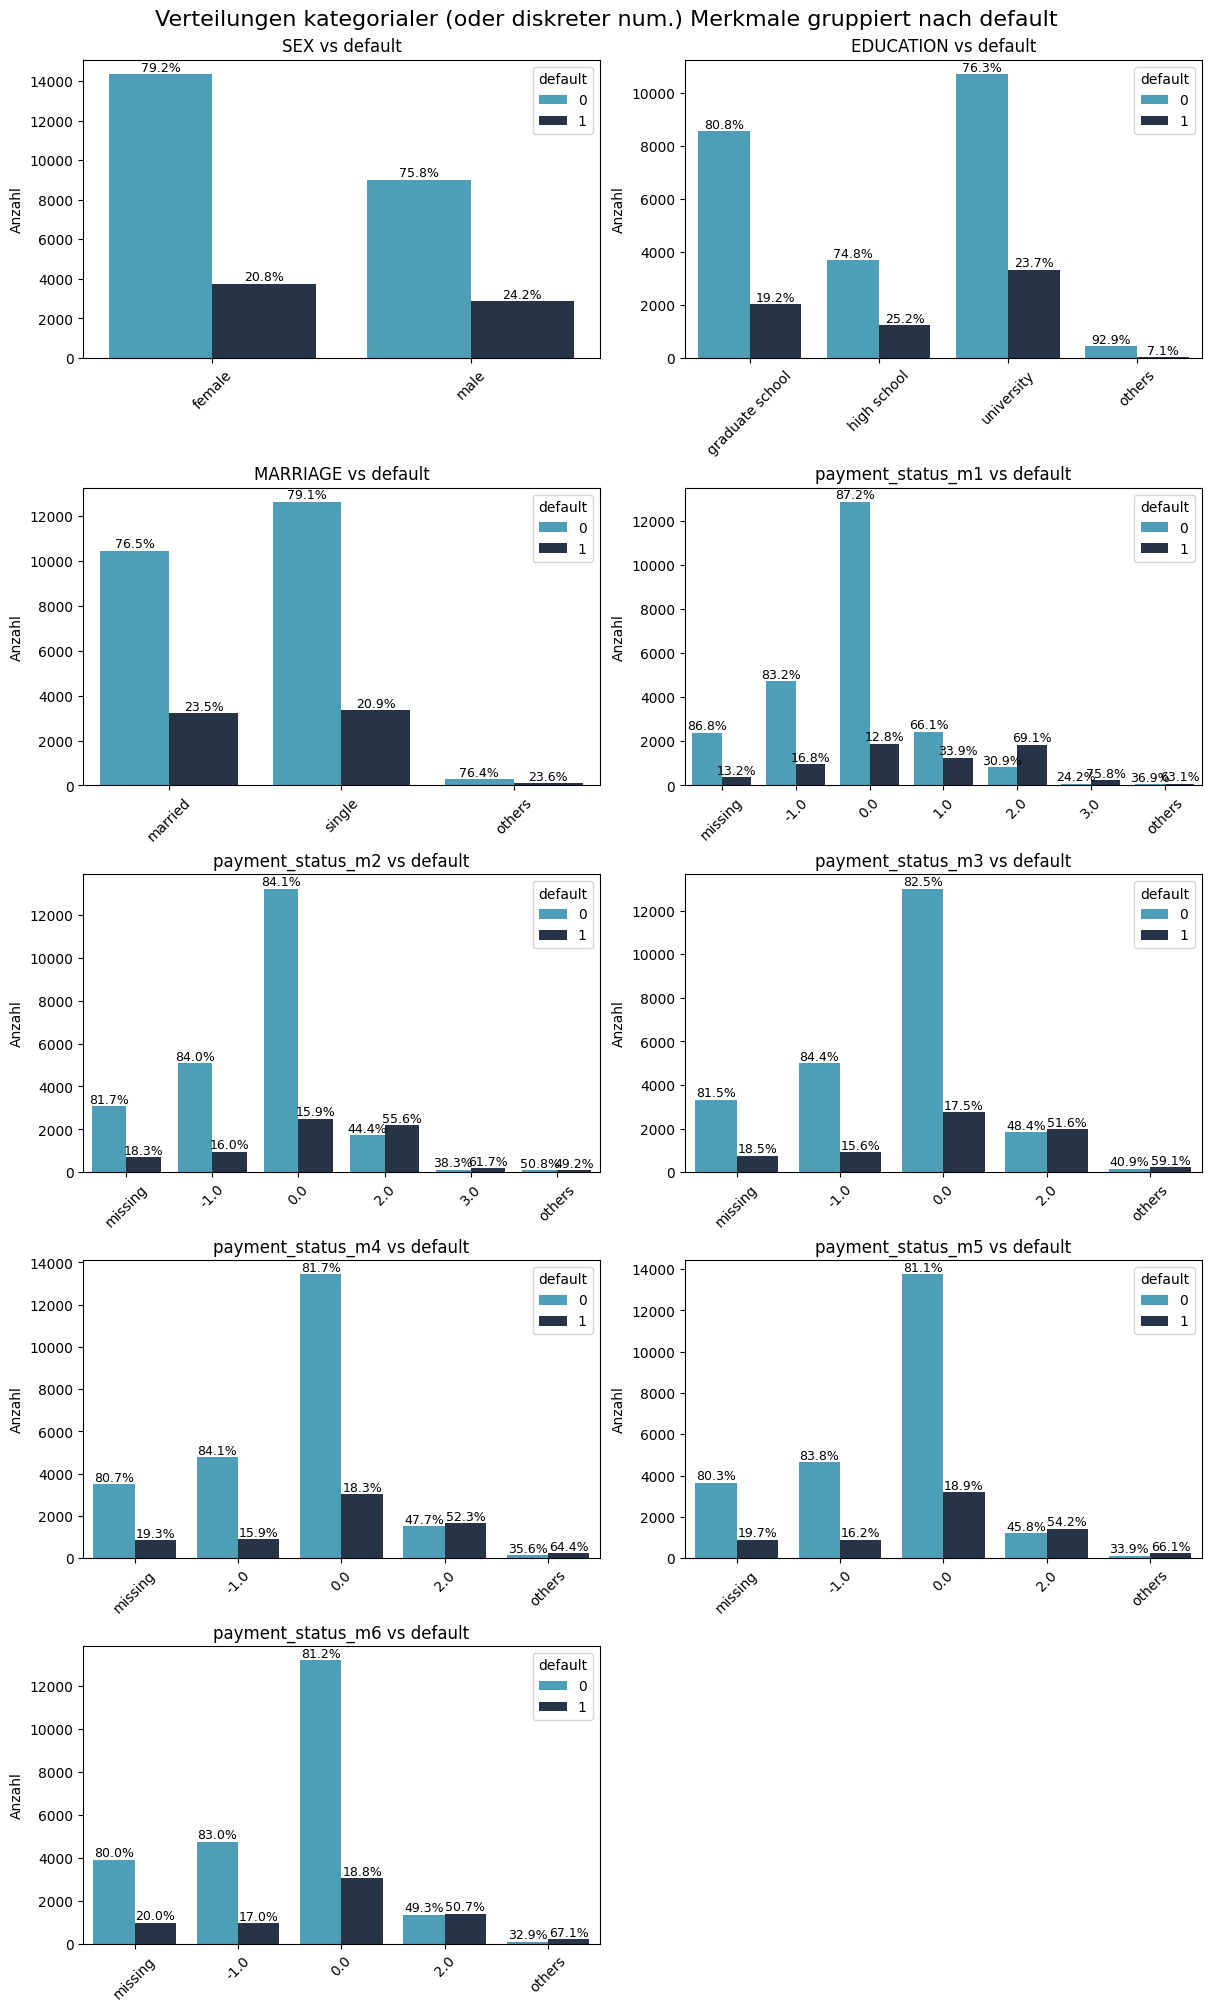

In [7]:
plot_features(df, target_col='default')

## 4. Modelle schätzen

In [8]:
X=df.drop(['ID','default'], axis = 1).copy()
y=df['default']

### 4.1 Logistische Regression

#### 4.1.1 Modellspezifische Vorbearbeitung

In [9]:

df_lr = df.copy().dropna()
X_lr = df_lr.drop(['ID','default'], axis = 1).copy()
y_lr=df_lr['default']
X_lr=pd.concat([X_lr.select_dtypes(exclude=['object']),pd.get_dummies(X_lr.select_dtypes(include=['object']),dummy_na=True,drop_first=True)],axis=1)
X_scaled = scaler.fit_transform(X_lr)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_scaled, y_lr, test_size=0.2, random_state=42
)


In [10]:
clf_lr = LogisticRegression(max_iter=1000,solver='newton-cg',penalty=None)
clf_lr.fit(X_train_lr,y_train_lr)

# Vorhersagewahrscheinlichkeiten berechnen
y_probs_lr = clf_lr.predict(X_test_lr)

gini = 2 * roc_auc_score(y_test_lr, y_probs_lr) - 1
print(f"Gini: {gini:.4f}")

Gini: 0.2831


### 4.2 XGBoost

### 4.2.1 Modellspezifische Vorbearbeitung

In [11]:
X_xgb=X.copy()
for col in X.select_dtypes(include='object').columns:
    X_xgb[col] = X[col].astype('category')
X_train, X_test, y_train, y_test = train_test_split(
    X_xgb, y, test_size=0.2, random_state=42
)

### 4.2.2 Modell trainieren

Enable Categorical = True

In [12]:
xgb_model = xgb.XGBClassifier(
    max_depth=5,
    enable_categorical=True           # Enable native categorical handling
)
xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,None


In [13]:
# Vorhersagewahrscheinlichkeiten berechnen
y_probs = xgb_model.predict_proba(X_test)[:, 1]

gini = 2 * roc_auc_score(y_test, y_probs) - 1
print(f"Gini: {gini:.4f}")

Gini: 0.5431


### 4.3 Graphiken


XGBoost eigene Funktion plot_tree ist meist nicht gut erkennbar

<Axes: >

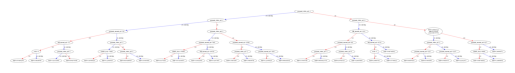

In [14]:
xgb.plot_tree(xgb_model,tree_idx=0)

Direkt mit graphviz bekommt man sehr große weiterverwendbare Graphiken

c:\Users\GesaMurphy\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


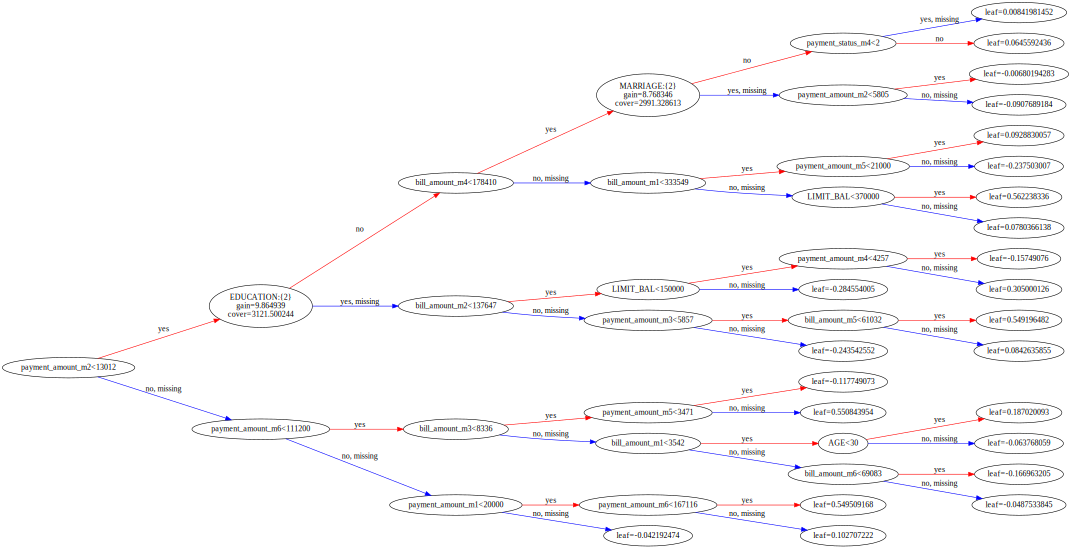

In [15]:
# Darstellung des zehnten Baumes
to_graphviz(xgb_model, num_trees=10, rankdir='LR', size = '15,8')

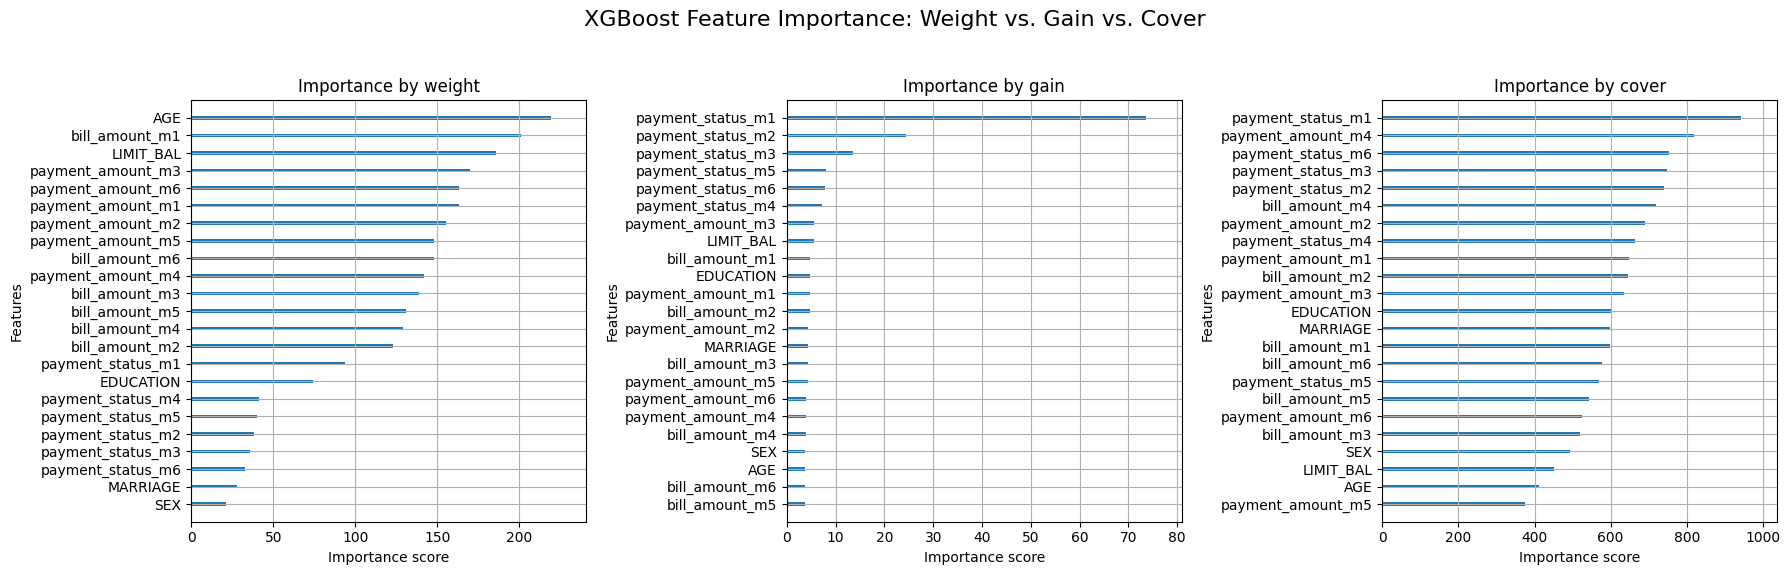

In [21]:
importance_types = ['weight', 'gain', 'cover']
# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('XGBoost Feature Importance: Weight vs. Gain vs. Cover', fontsize=16)

for ax, imp_type in zip(axes, importance_types):
    xgb.plot_importance(xgb_model, importance_type=imp_type,show_values=False,ax=ax)
    ax.set_title('Importance by ' + imp_type)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
#xgb.plot_importance(xgb_model, importance_type='gain', xlabel='Gain', title = 'Feature Importance by Gain',show_values=False)
#plt.show()

Kurzerklärung

| Importance Type     | Bedeutung                          | Fokus                    |
|---------|------------------------------------|--------------------------|
| weight  | Wie oft das Feature verwendet wird  | Häufigkeit               |
| gain    | Wie viel der Fehler reduziert wurde    | Verbesserung der Modellgüte    |
| cover   | Wie viele Daten betroffen waren    | Datenabdeckung           |

#### Model mit (bisher) maximalen Parametern

In [17]:
xgb_model_max = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.15,
    reg_lambda=3,
    reg_alpha=4,
    gamma=2,
    colsample_bytree=0.8,
    objective='binary:logistic',
    n_estimators=100,
    eval_metric='logloss',
    enable_categorical=True
)
xgb_model_max.fit(X_train, y_train)

# Vorhersagewahrscheinlichkeiten berechnen
y_probs = xgb_model_max.predict_proba(X_test)[:, 1]

gini = 2 * roc_auc_score(y_test, y_probs) - 1
print(f"Gini: {gini:.4f}")

Gini: 0.5679


## 5. Erklärbarkeit mit SHAP

In [18]:
# SHAP explanation
explainer = shap.Explainer(xgb_model_max)
shap_values = explainer(X_test)

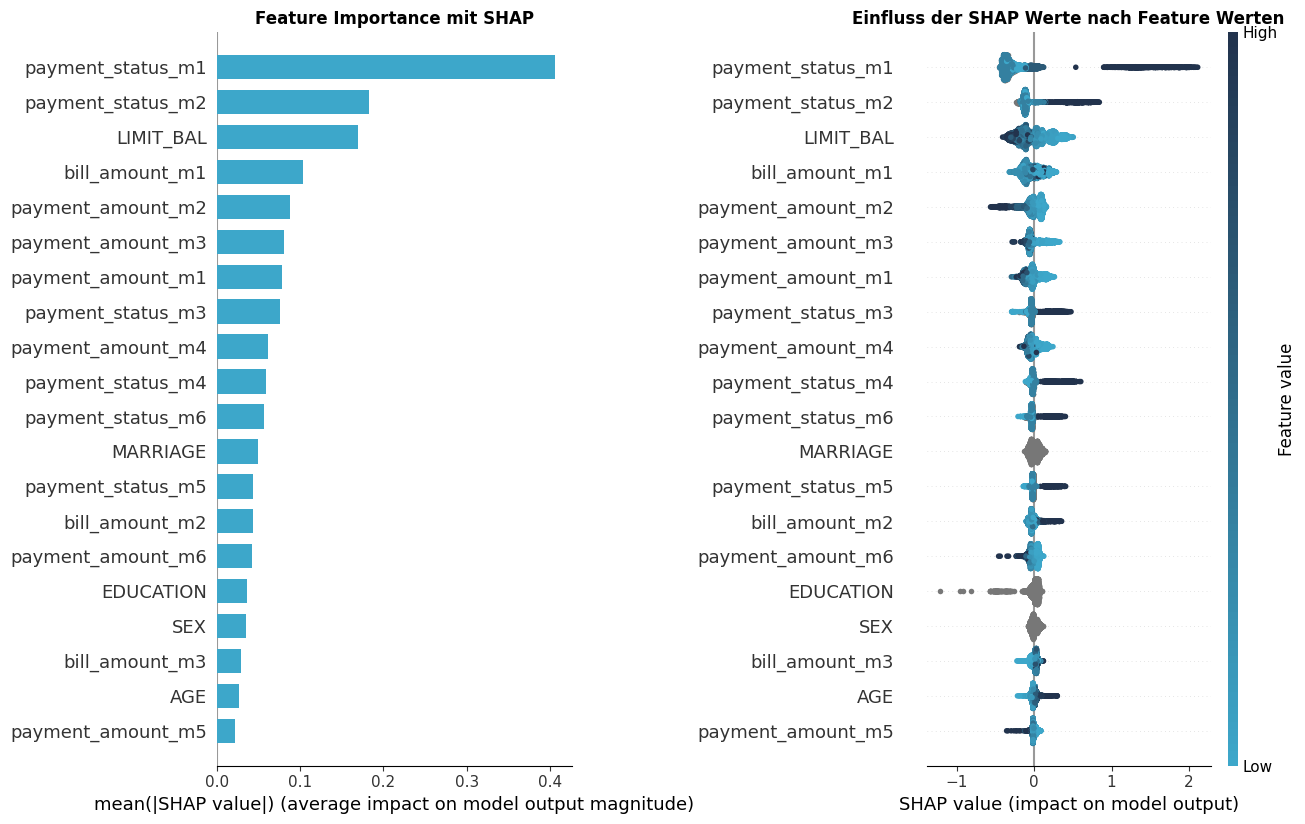

In [19]:
# Summary plot
fig, (ax0, ax1) = plt.subplots(1, 2)
#fig.suptitle('Vergleich der SHAP Werte für Missings', fontweight='bold', y=1.02)
plt.sca(ax0)
#shap.plots.beeswarm(shap_values[mask_missing], color=custom_cmap, show=False)
shap.summary_plot(shap_values, X_test, cmap=custom_cmap, plot_type='bar', show=False)
ax0.set_title('Feature Importance mit SHAP', fontweight='bold')
plt.sca(ax1)
#shap.plots.beeswarm(shap_values[~mask_missing], color=custom_cmap, show=False)
shap.summary_plot(shap_values, X_test, cmap=custom_cmap, show=False)
ax1.set_title('Einfluss der SHAP Werte nach Feature Werten', fontweight='bold')
plt.subplots_adjust(wspace=1)
fig.set_size_inches(16, 10) # waterfall seems to update the figsize
plt.subplots_adjust(wspace=1, top=0.8)
plt.show()

c:\Users\GesaMurphy\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


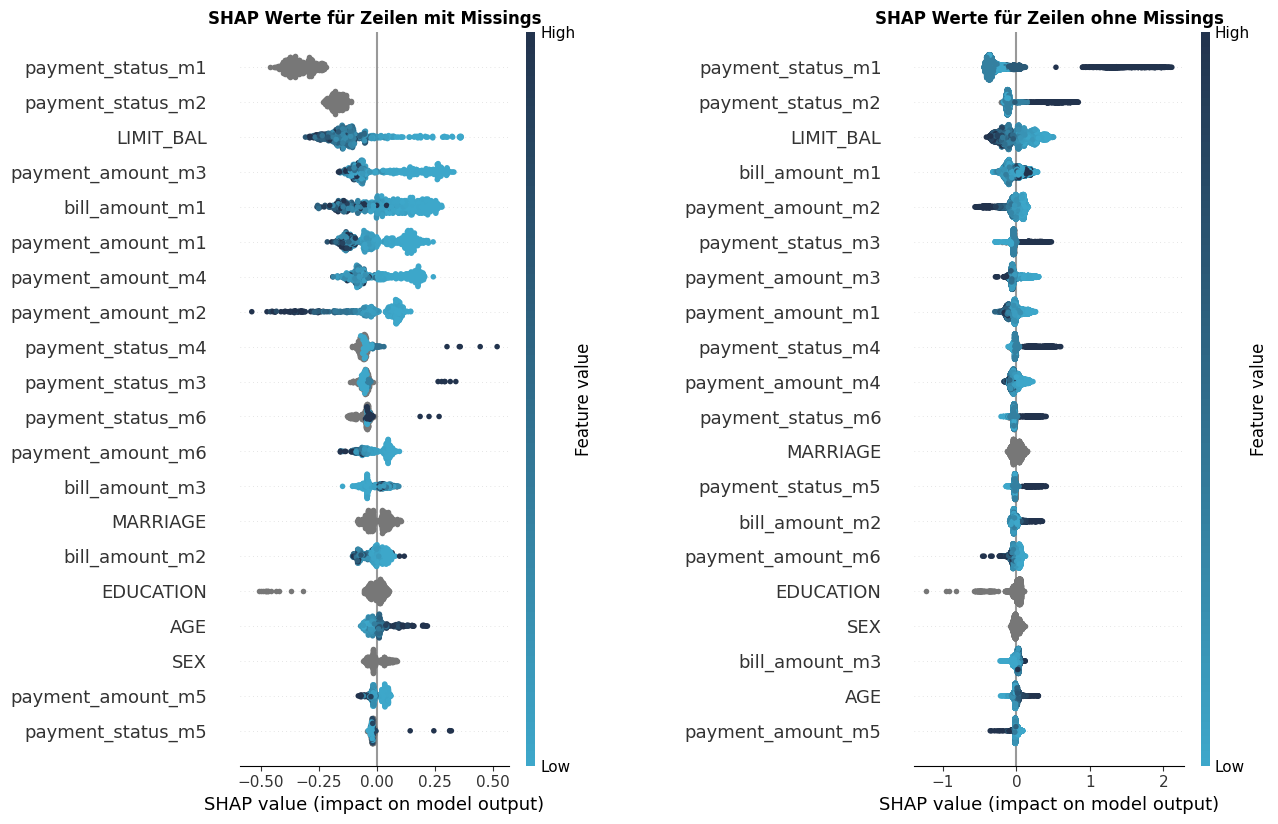

In [20]:
mask_missing = X_test['payment_status_m1'].isna().values

fig, (ax0, ax1) = plt.subplots(1, 2)
#fig.suptitle('Vergleich der SHAP Werte für Missings', fontweight='bold', y=1.02)
plt.sca(ax0)
#shap.plots.beeswarm(shap_values[mask_missing], color=custom_cmap, show=False)
shap.summary_plot(shap_values[mask_missing], X_test[mask_missing], cmap=custom_cmap, show=False)
ax0.set_title('SHAP Werte für Zeilen mit Missings', fontweight='bold')
plt.sca(ax1)
#shap.plots.beeswarm(shap_values[~mask_missing], color=custom_cmap, show=False)
shap.summary_plot(shap_values[~mask_missing], X_test[~mask_missing], cmap=custom_cmap, show=False)
ax1.set_title('SHAP Werte für Zeilen ohne Missings', fontweight='bold')
plt.subplots_adjust(wspace=1)
fig.set_size_inches(16, 10) # waterfall seems to update the figsize
plt.subplots_adjust(wspace=1, top=0.8)
plt.show()